In [1]:
from bs4 import BeautifulSoup
import requests
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

In [40]:
import re

In [2]:
url="https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"

In [3]:

resp= requests.get(url)

if resp.status_code!=200:
  print(f"error:{resp.status_code}")
  resp=None
else:
  print(resp.status_code)


200


In [4]:
sopa = BeautifulSoup(resp.content, "html.parser")

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/epLEDwZlytU7oXqdtOyNX8n-VUfClMcgocgp-uAYSyI/mobilex2a/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDUvNTQvODUvMDEvMi94MDEuanBnPzE0NjQ5MzgwMzA3PSZtZDU9ZjkyMmI1MGQyZTA1MWVhNDEzMTU1ZjBmM2Y5YTgxNWY" rel="preload"/><link data-precedence="next" href="/hera/_next/static/css/947b97ffbe7f670e.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/4621d5856ff84749.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/8517fc2698044916.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/1e0ae1308e6b8f46.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/d1a51260c3e4ab42.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/ec946dd50768
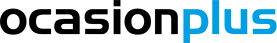

In [5]:
sopa

In [10]:
nombres_coches=sopa.find_all("span",{"data-test":"span-brand-model"})

In [11]:
nombres_coches[0]

<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Renault Mégane</span>

In [63]:
precios_originales = sopa.find_all("span",{"data-test":"span-price"})
p = sopa.find_all("span",{"data-test":"span-price"})

In [ ]:
nombre_precio = sopa.find_all("span",{"class":"cardVehicle_spot__e6YZx"})

Con este bucle se almacenan los nombres y los precios orginales que existen. Si algún coche no tiene precio, se guarda en la lista de precios_originales_1 como `None`. Así las dos listas son iguales y se puede crear mejor el DataFrame.

In [ ]:
nombres = []
precios_originales_1 = []
patron_nombre = re.escape("brand-model")
patron_precio = re.escape("span-price")
for i in range(len(nombre_precio)):
    if re.search(patron_precio, str(t[i])) != None:
        precios_originales_1.append(t[i])
    elif re.search(patron_nombre, str(t[i])) != None and re.search(patron_precio, str(t[i+1])) == None:
        nombres.append(t[i])
        precios_originales_1.append(None)
    elif re.search(patron_nombre, str(t[i])) != None:
        nombres.append(t[i])


In [129]:
for i in range(len(nombres)):
    print (nombres[i], precios_originales_1[i])


<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Renault Mégane</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">15.300€</span>
<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Seat León</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">14.700€</span>
<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mercedes CLA</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">37.390€</span>
<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Fiat Panda</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">16.290€</span>
<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">BMW Serie 1</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">29.750€</span>
<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Volkswagen Tiguan</span> <span class="cardVehicle_spot__e6YZx" data-test="span-price">22.990€</span>
<span class="cardVehi

In [22]:
precios_con_descuento = sopa.find_all("span", {"data-test": "span-finance"})